In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_path = '/content/drive/My Drive/Colab Notebooks/AV-Loan-Prediction/train.csv'
test_path = '/content/drive/My Drive/Colab Notebooks/AV-Loan-Prediction/test.csv'
submission_path = '/content/drive/My Drive/Colab Notebooks/AV-Loan-Prediction/sample_submission.csv'

In [3]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.shape,test.shape

((614, 13), (367, 12))

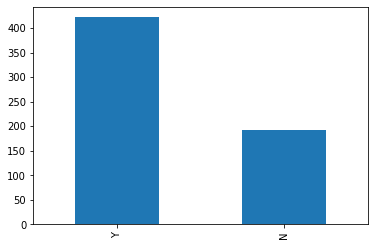

In [7]:
train['Loan_Status'].value_counts().plot.bar()

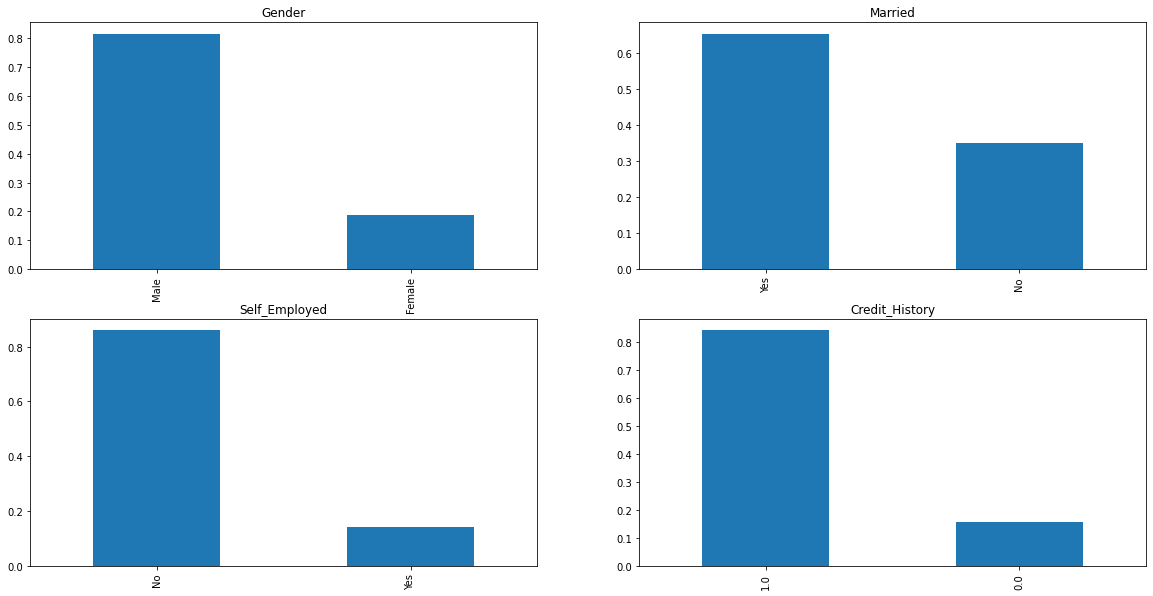

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

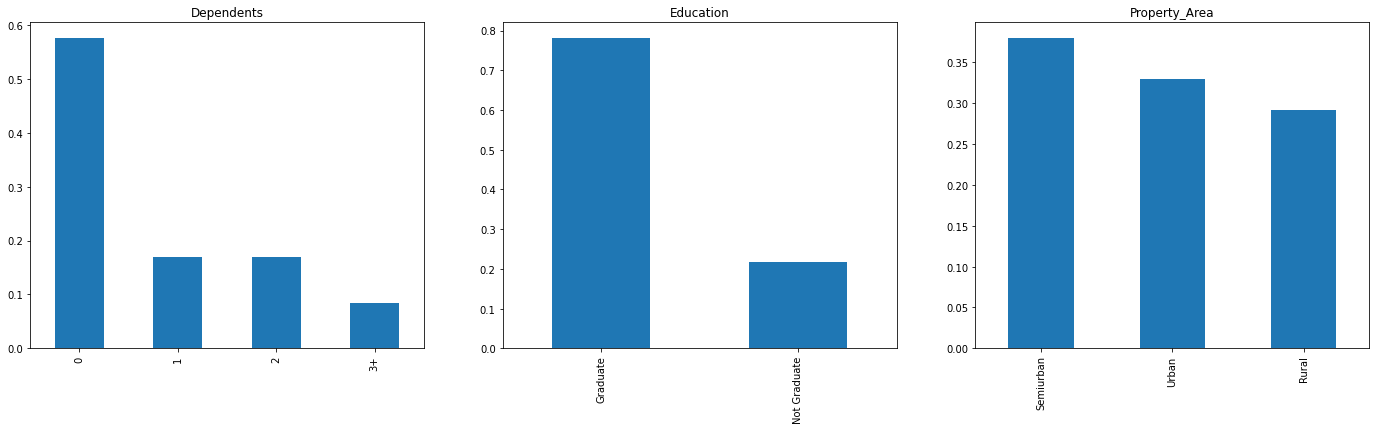

In [9]:
plt.figure(figsize=(24,6))
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

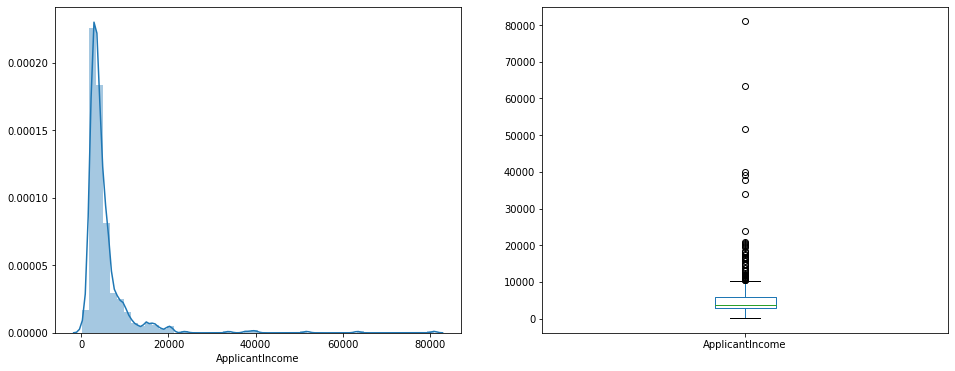

In [10]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
#sns.boxplot(data=train['ApplicantIncome'])
train['ApplicantIncome'].plot.box()

Text(0.5, 0.98, '')

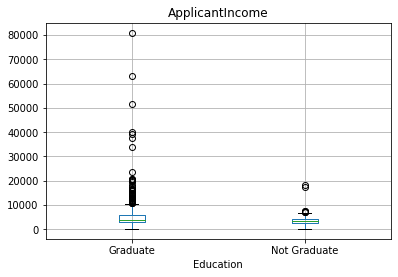

In [11]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

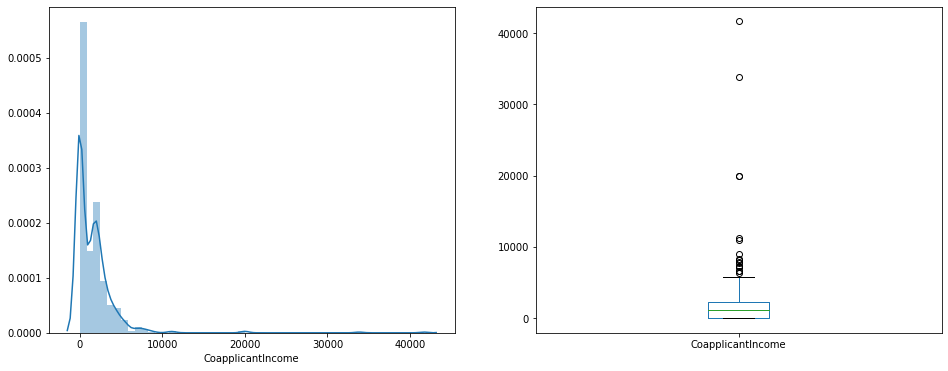

In [12]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
#sns.boxplot(data=train['ApplicantIncome'])
train['CoapplicantIncome'].plot.box()

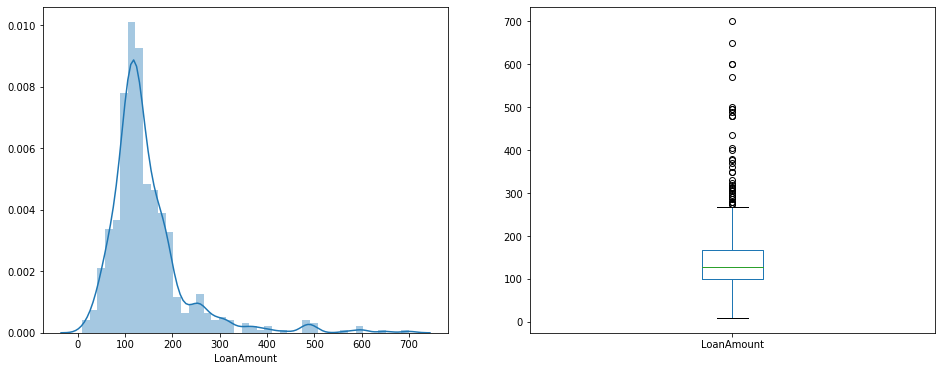

In [13]:
plt.figure(figsize=(16,6))
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box()

In [14]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [16]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [17]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [18]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

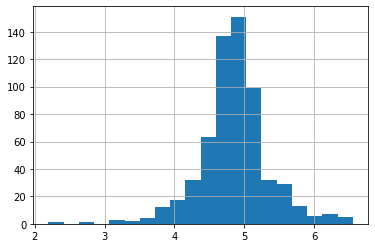

In [19]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [20]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [21]:
X=train.drop('Loan_Status',axis=1)
y=train.Loan_Status

In [22]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8054054054054054

In [27]:
pred_test =model.predict(test)
submission['Loan_Status']=pred_test

In [28]:
submission['Loan_Status'].replace(0,'N', inplace=True)
submission['Loan_Status'].replace(1,'Y', inplace=True)

In [29]:
submission['Loan_ID']=test_original['Loan_ID']

In [30]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [31]:
from sklearn.model_selection import StratifiedKFold
i =1 
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index, test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl= X.loc[train_index],X.loc[test_index]
  ytr,yvl = y[train_index],y[test_index]
  model = LogisticRegression(random_state=1)
  model.fit(xtr,ytr)
  score=accuracy_score(yvl,model.predict(xvl))
  print('accuracy_score',score)
  i+=1
  pred_test = model.predict(test)
  pred=model.predict(xvl)


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


In [32]:
pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

```python
from sklearn import metrics
fpr, tpr ,_= metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlablel('False Postive Rate')
plt.ylablel('True Postive Rate')
plt.legend(loc=4)
plt.show()
```

In [34]:
submission['Loan_Status'].replace(0,'N', inplace=True)
submission['Loan_Status'].replace(1,'Y', inplace=True)
submission['Loan_ID']=test_original['Loan_ID']
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

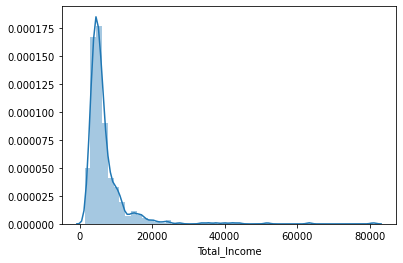

In [35]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
sns.distplot(train['Total_Income'])

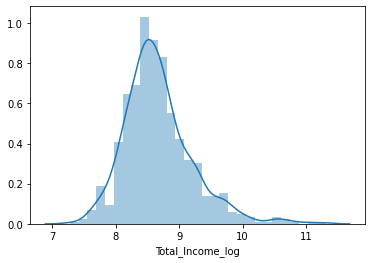

In [36]:
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

In [37]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

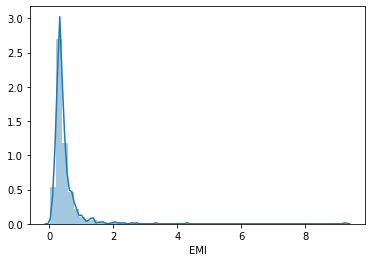

In [38]:
sns.distplot(train['EMI'])

In [39]:
train['Balance_Income']=train['Total_Income']-(train["EMI"]*1000)
test['Balance_Income']=test['Total_Income']-(test["EMI"]*1000)

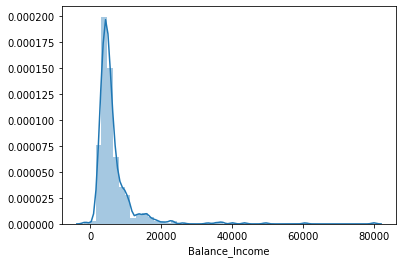

In [40]:
sns.distplot(train['Balance_Income'])
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)